# About
This notebook shows how to make a generative art based on Voronoi diagram. This is revised and annotated based on the great tutorial from https://www.generativehut.com/post/robots-and-generative-art-and-python-oh-my

In [170]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from ipywidgets import interactive

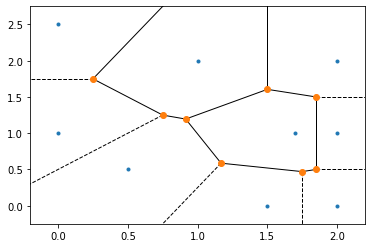

In [171]:
# given a set of points, a voronoi diagram can be generated
points = np.array([[0.5, 0.5], [0, 1], [0, 2.5], [1.5, 0], [1.7, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

In [174]:
# 9 vertices as shown as the orange points above with index from 0 to 8
# note that one vertex is outside the diagram [1.5, 4.25], which is different from the vertices connected via dashed lines
# e.g. the closed region in the middle have 6 vertices respectively

vertices = vor.vertices
vertices

array([[0.25      , 1.75      ],
       [1.5       , 4.25      ],
       [0.75      , 1.25      ],
       [0.91451613, 1.19516129],
       [1.85      , 1.5       ],
       [1.5       , 1.605     ],
       [1.16818182, 0.58636364],
       [1.85      , 0.5       ],
       [1.75      , 0.47      ]])

In [175]:
# the index of each vertex of each region, -1 indicates vertex outside the Voronoi diagram
regions = vor.regions
regions

[[1, -1, 0],
 [2, 0, -1],
 [],
 [8, 6, 3, 5, 4, 7],
 [6, -1, 2, 3],
 [5, 1, 0, 2, 3],
 [7, -1, 4],
 [5, 1, -1, 4],
 [8, -1, 6],
 [8, -1, 7]]

In [177]:
# show the vertices in a specific region, i.e., the closed region in the center
vertices[vor.regions[3]]

array([[1.75      , 0.47      ],
       [1.16818182, 0.58636364],
       [0.91451613, 1.19516129],
       [1.5       , 1.605     ],
       [1.85      , 1.5       ],
       [1.85      , 0.5       ]])

In [178]:
# how to generate 5 points with x and y coordinate
num_of_points = 5
coordinates = np.random.uniform(1, 10, num_of_points*2)  # generate 10 random number with range [1, 10]
print(coordinates)
# reshape coordinates to get points
points = coordinates.reshape((5, 2))
print(points)

[7.29242233 6.82455259 2.35684592 7.81014708 9.91399849 8.64600379
 4.14528331 9.93322695 1.47862585 5.04069272]
[[7.29242233 6.82455259]
 [2.35684592 7.81014708]
 [9.91399849 8.64600379]
 [4.14528331 9.93322695]
 [1.47862585 5.04069272]]


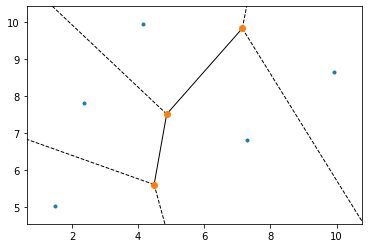

In [179]:
voronoi = Voronoi(points)
vertices = voronoi.vertices
regions = voronoi.regions 
# this is a list of all the points that are the verticies in are diagram
fig = voronoi_plot_2d(voronoi)
plt.show()

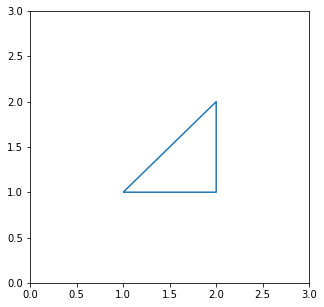

In [158]:
# how to use connect points with lines
triangle = np.array([
    [1, 1],
    [2, 1],
    [2, 2],
    [1, 1],
])

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
lc = LineCollection([triangle])  # note [] outside triangle here
ax.add_collection(lc)

In [161]:
# evenly spaced numbers in a specified interval 
# 5 numbers from 0.1 to 1, 1 is excluded by using endpoint=False
np.linspace(0.1, 1, 5, endpoint=False)

array([0.1 , 0.28, 0.46, 0.64, 0.82])

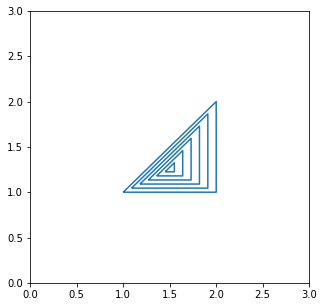

In [169]:
# "fill" the triangle by creating some smaller triangles via scaling

center = np.mean(triangle, axis=0)  # get the center of the vertices

triangles = []
num_fill = 5  # number of smaller triangles
scalers = np.linspace(0.1, 1, num_fill, endpoint=False)

for scaler in scalers:
    triangle_scaled = scaler * (triangle - center) + center  # scale the distance to center
    triangles.append(triangle_scaled)

triangles.append(triangle)  # add the original triangle
    
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
lc = LineCollection(triangles)
ax.add_collection(lc)

(100, 2)


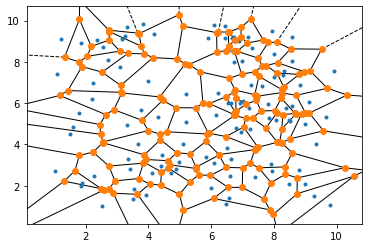

In [180]:
num_of_points = 100
# get random coordinates for x and y
# each points has two coordinates, that's why we need num_of_points*2 below
coordinates = np.random.uniform(1, 10, num_of_points*2)
# reshape coordinates to get points
points = coordinates.reshape((num_of_points, 2))
print(points.shape)

voronoi = Voronoi(points)
vertices = voronoi.vertices
regions = voronoi.regions 
# this is a list of all the points that are the verticies in are diagram
fig = voronoi_plot_2d(voronoi)
plt.show()

In [181]:
# in order to use lines to connect all vertices for each region, we need to do the following:
# 1. remove empty regions and regions with index -1, which means vertex outside the Voronoi diagram
# 2. add the starting index to the end of the array so that lines can close, e.g., [1, 3, 5] will become [1, 3, 5, 1]

regions_updated = []
for r in regions:
    if len(r)>0 and -1 not in r:
        regions_updated.append(r + r[0:1])

print(regions_updated[:2])

# now we know the index of vertices in each regions
# we can get the coordinates for each vertices in each regions

region_vertices = []
for r in regions_updated:
    region_vertices.append(vertices[r])

print(region_vertices[:2])

[[30, 27, 26, 28, 29, 30], [29, 15, 20, 21, 28, 29]]
[array([[3.14448962, 6.52755698],
       [1.43742757, 6.61255214],
       [1.88711733, 7.77575394],
       [2.5284792 , 7.50289411],
       [3.12343926, 6.85827774],
       [3.14448962, 6.52755698]]), array([[3.12343926, 6.85827774],
       [4.14957371, 8.20722196],
       [3.87686135, 8.39013781],
       [3.35243988, 8.4112845 ],
       [2.5284792 , 7.50289411],
       [3.12343926, 6.85827774]])]


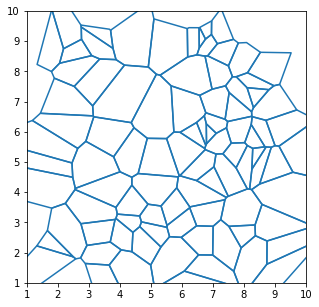

In [201]:
fig, ax = plt.subplots(figsize=(5, 5))
# if we send x, y limits as the range of random coordinates for the points
# some areas along the borders are quite empty, so we set the x, y limits smaller
ax.set_xlim(1, 10)
ax.set_ylim(1, 10)
lc = LineCollection(region_vertices)
ax.add_collection(lc)

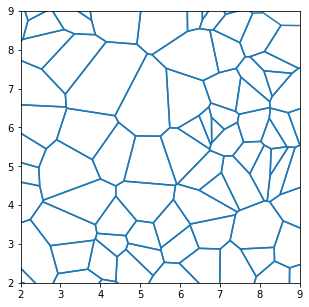

In [202]:
fig, ax = plt.subplots(figsize=(5, 5))
# if we send x, y limits as the range of random coordinates for the points
# some areas along the borders are quite empty, so we set the x, y limits smaller
ax.set_xlim(1+1, 10-1)
ax.set_ylim(1+1, 10-1)
lc = LineCollection(region_vertices)
ax.add_collection(lc)

88
26


/var/folders/pj/bgdff0390xgg_836zl2q91dh0000gn/T/ipykernel_23722/1146665866.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  regions_to_fill = np.random.choice(region_vertices, num_regions_to_fill, replace=False)


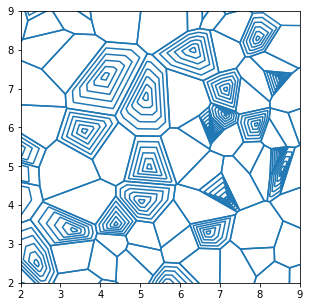

In [208]:
# total regions 
print(len(regions_updated))

# percentage of regions to be "filled"
percent_to_fill = 0.3

num_regions_to_fill = int(percent_to_fill * len(regions_updated))
print(num_regions_to_fill)

# random choose the regions to fill
regions_to_fill = np.random.choice(region_vertices, num_regions_to_fill, replace=False)

fill = []
scalers = np.linspace(0.1, 1, num_fill, endpoint=False)
    
for r in regions_to_fill:
    center = np.mean(r, axis=0)
    for scaler in scalers:
        scaled = scaler*(r - center) + center
        fill.append(scaled)

fig, ax = plt.subplots(figsize=(5, 5))
#ax.set_aspect('equal')
ax.set_xlim(1+1, 10-1)
ax.set_ylim(1+1, 10-1)

lc = LineCollection(region_vertices + fill)
ax.add_collection(lc)

In [217]:
def create_art(num_of_points=200, percent_to_fill=0.4, num_of_fill=5):
    """
    generate voronoi art
    num_of_points: number of points on the diagram
    percent_to_fill: percentage of regions to be filled
    num_of_fill: total smaller regions to fill
    """

    # bounds for the random generated point coordinates
    coordinate_bounds = np.array([1, 10])

    # get random coordinates for x and y
    # each points has two coordinates, that's why we need num_of_points*2 below
    #coordinates = np.random.uniform(1, 10, num_of_points*2)
    coordinates = np.random.uniform(*coordinate_bounds, num_of_points*2)
    # reshape coordinates to get points
    points = coordinates.reshape((num_of_points, 2))

    voronoi = Voronoi(points)
    vertices = voronoi.vertices
    regions = voronoi.regions 
    
    # in order to use lines to connect all vertices for each region, we need to do the following:
    # 1. remove empty regions and regions with index -1, which means vertex outside the Voronoi diagram
    # 2. add the starting index to the end of the array so that lines can close, e.g., [1, 3, 5] will become [1, 3, 5, 1]

    regions_updated = []
    for r in regions:
        if len(r)>0 and -1 not in r:
            regions_updated.append(r + r[0:1])

    # now we know the index of vertices in each regions
    # we can get the coordinates for each vertices in each regions

    region_vertices = []
    for r in regions_updated:
        region_vertices.append(vertices[r])

    num_regions_to_fill = int(percent_to_fill * len(regions_updated))

    # random choose the regions to fill
    regions_to_fill = np.random.choice(region_vertices, num_regions_to_fill, replace=False)

    regions_filled = []

    # get the scalers between 0.1 and 1
    scalers = np.linspace(0.1, 1, num_of_fill, endpoint=False)
    
    # loop over the regions to fill to create smaller regions
    for r in regions_to_fill:
        center = np.mean(r, axis=0)
        for scaler in scalers:
            scaled = scaler * (r - center) + center  # scaled regions
            regions_filled.append(scaled)

    fig, ax = plt.subplots(figsize=(5, 5))
    #ax.set_aspect('equal')

    # the edge space to be cut from the generated plot
    # see explaination above
    edge_space = 1

    plot_lim = coordinate_bounds + np.array([edge_space, -edge_space])
    ax.set_xlim(*plot_lim)  #ax.set_xlim(1+1, 10-1)
    ax.set_ylim(*plot_lim)  #ax.set_ylim(1+1, 10-1)

    lc = LineCollection(region_vertices + regions_filled)
    ax.add_collection(lc)

    plt.grid(False)
    plt.axis('off')
    plt.show()
    
    return fig, ax

In [220]:
# make interactive function call
art = interactive(
    create_art,
    num_of_points=(10, 1000, 25),
    percent_to_fill=(0., 1., 0.05),
    num_of_fill=(1, 10, 1),
)

display(art)

interactive(children=(IntSlider(value=200, description='num_of_points', max=1000, min=10, step=25), FloatSlide…

In [213]:
# save to SVG
fig, ax = art.result
fig.savefig('art.svg', bbox_inches = 'tight', pad_inches = 0)

In [214]:
# See https://vpype.readthedocs.io/en/stable/cookbook.html#laying-out-a-svg-for-plotting
# Use vpype to rescale the SVG to 3x3 (inch) for letter size page plotting in landscape

!vpype read art.svg scaleto 4in 4in layout --landscape letter write art-scaled.svg